In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from fit import get_expectations_carrabin
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Reproduce Carrabin Fig 3

In [2]:
human = pd.read_pickle("data/carrabin.pkl")
dfs = []
columns = ['type', 'sid', 'trial', 'stage', 'color', 'response'] 
for sid in human['sid'].unique():
    for trial in human.query("sid==@sid")['trial'].unique():
        for stage in human.query("sid==@sid & trial==@trial")['stage'].unique():
            color = human.query("sid==@sid & trial==@trial & stage==@stage")['color'].unique()[0]
            response_bayes = get_expectations_carrabin("bayes", None, sid, trial, stage)
            # response_bayesPE = get_expectations_carrabin("bayesPE", None, sid, trial, stage)
            dfs.append(pd.DataFrame([["bayes", sid, trial, stage, color, response_bayes]], columns=columns))
            # dfs.append(pd.DataFrame([["bayesPE", sid, trial, stage, color, response_bayesPE]], columns=columns))
bayes = pd.concat(dfs, ignore_index=True)

In [3]:
human['bayes'] = bayes['response']
bayes['bayes'] = bayes['response']
combined = pd.concat([human, bayes], ignore_index=True)

In [4]:
combined

,type,sid,trial,stage,color,response,bayes
0,human,1,1,1,1,0.500000,0.333333
1,human,1,1,2,-1,0.000000,0.000000
2,human,1,1,3,-1,-0.500000,-0.200000
3,human,1,1,4,-1,-0.598000,-0.333333
4,human,1,1,5,-1,-0.800000,-0.428571
...,...,...,...,...,...,...,...
41505,bayes,21,200,1,1,0.333333,0.333333
41506,bayes,21,200,2,1,0.500000,0.500000
41507,bayes,21,200,3,1,0.600000,0.600000
41508,bayes,21,200,4,1,0.666667,0.666667


/tmp/ipykernel_7477/3530315094.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)


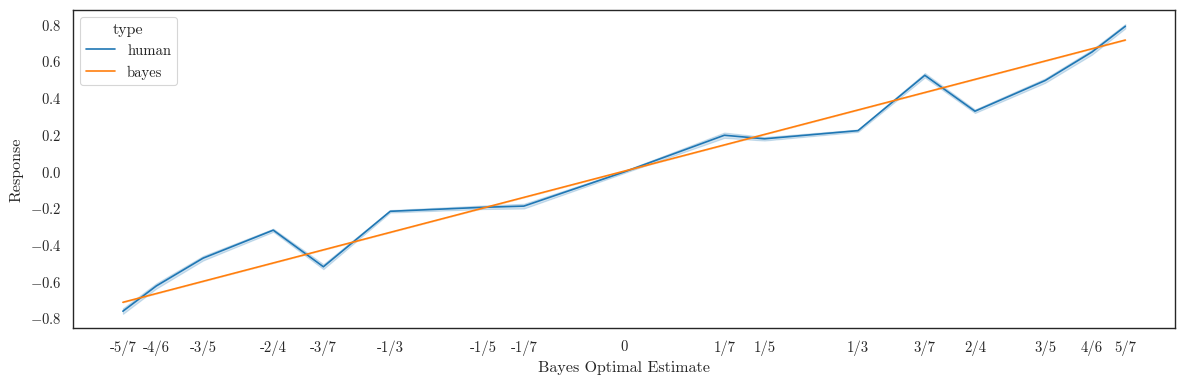

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
# labels = ['1/7', '1/6', '1/5', '1/4', '2/7', '1/3', '2/5', '3/7', '1/2', '4/7', '3/5', '2/3', '5/7', '3/4', '4/5', '5/6', '6/7']
xticks = [-5/7, -4/6, -3/5, -2/4, -3/7, -1/3, -1/5, -1/7, 0, 1/7, 1/5, 1/3, 3/7, 2/4, 3/5, 4/6, 5/7]
labels = ['-5/7', '-4/6', '-3/5', '-2/4', '-3/7', '-1/3', '-1/5', '-1/7', '0', '1/7', '1/5', '1/3', '3/7', '2/4', '3/5', '4/6', '5/7']
sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)
ax.set(xlabel='Bayes Optimal Estimate', xticks=xticks, xticklabels=labels, ylabel='Response')
plt.tight_layout()
plt.show()